# Tunable Coupler (MIT)

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

### Create the design in Metal
Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant.

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '3mm'
design.chips.main.size['size_y'] = '3mm'

gui = MetalGUI(design)

Create two crossmons coupled together with an interdigitated tunable coupler.

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.couplers.tunable_coupler_01 import TunableCoupler01

In [4]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'orientation': '0',
 'layer': '1',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [5]:
TunableCoupler01.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {},
 'orientation': '0',
 'layer': '1',
 'c_width': '400um',
 'l_width': '20um',
 'l_gap': '10um',
 'a_height': '60um',
 'cp_height': '15um',
 'cp_arm_length': '30um',
 'cp_arm_width': '6um',
 'cp_gap': '6um',
 'cp_gspace': '3um',
 'fl_width': '5um',
 'fl_gap': '3um',
 'fl_length': '10um',
 'fl_ground': '2um',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [6]:
Q1 = TransmonCrossFL(design, 'Q1', options = dict(pos_x = '0', pos_y='-0.3mm',
                                                 connection_pads = dict(
                                                     bus_01 = dict(connector_location = '180',claw_length ='95um'),
                                                     readout = dict(connector_location = '0')),
                                                 fl_options = dict()))

Q2 = TransmonCrossFL(design, 'Q2', options = dict(pos_x = '0', pos_y='0.3mm', orientation = '180',
                                                 connection_pads = dict(
                                                     bus_02 = dict(connector_location = '0',claw_length ='95um'),
                                                     readout = dict(connector_location = '180')),
                                                 fl_options = dict()))


tune_c_Q12 = TunableCoupler01(design,'Tune_C_Q12', options = dict(pos_x = '-0.06mm', pos_y = '0', 
                                                                  orientation=90, c_width='500um'))

gui.rebuild()
gui.autoscale()

In [7]:
# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()

gui.zoom_on_components(all_component_names)

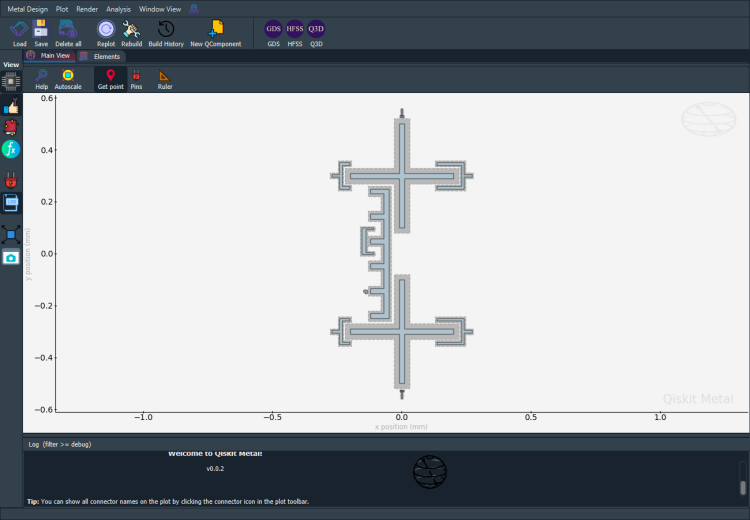

In [8]:
#Save screenshot as a .png formatted file.
gui.screenshot()

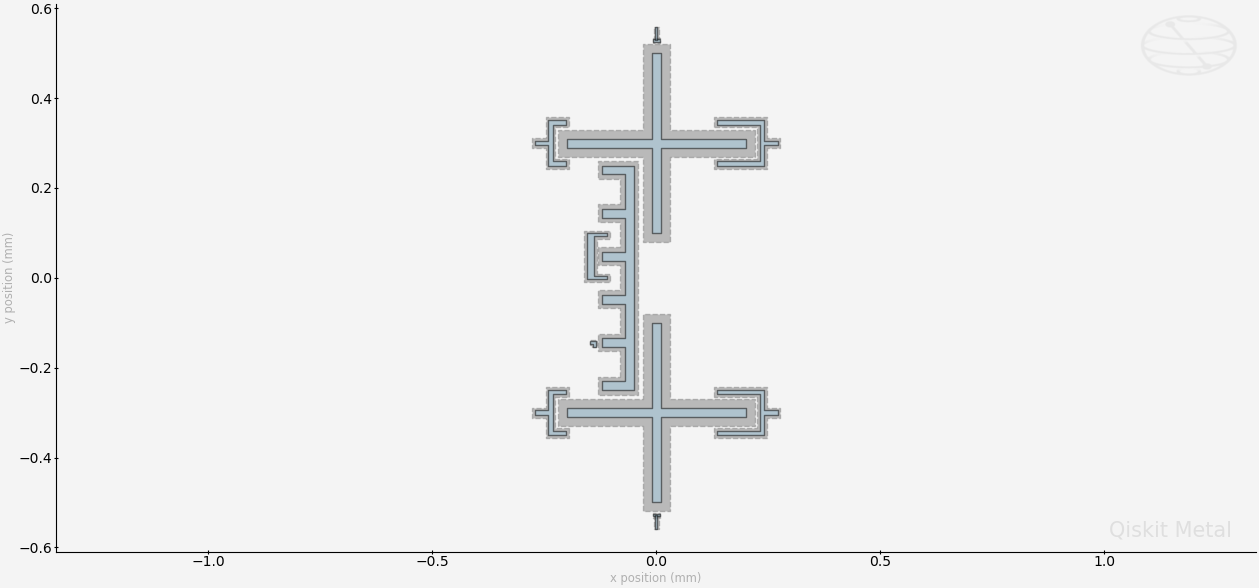

In [9]:
# Screenshot the canvas only as a .png formatted file.
gui.figure.savefig('shot.png')

from IPython.display import Image, display
_disp_ops = dict(width=500)
display(Image('shot.png', **_disp_ops))

In [10]:
# Closing the Qiskit Metal GUI
gui.main_window.close()

True